# Introduction to convnets

 ### Instantiating a small convnet

In [7]:
import os
import shutil
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Batch size'ı almıyor 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu",
                       input_shape =(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
# a convnet takes as input tensors of shape( image_height, image_width, image_channels). (28,28,1)
# is the input size of MNIST images.
model.summary()
# The width and height dimensions tend to shrink as you go deeper in the network.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten()) # flatten the 3D outputs to 1D
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax")) # We'll do 10-way classification

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

### Training the convnet on MNIST Images

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32")/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 32s 33ms/step - loss: 1.9781 - accuracy: 0.2675
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.3638 - accuracy: 0.8873
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.1770 - accuracy: 0.9436
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.1160 - accuracy: 0.9641
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0840 - accuracy: 0.9724


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 5ms/step - loss: 23.7708 - accuracy: 0.9082


0.9082000255584717

In [14]:
import os, shutil

original_dataset_dir = "C:/Users/baris/Downloads/dogs-vs-cats"

base_dir = "C:/Users/baris/Downloads/dogs-vs-cats-small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)


In [15]:
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir) # directory with training cat pictures

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [18]:
original_dataset_dir = "C:/Users/baris/Downloads/dogs-vs-cats/train/train"

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test cat images: 500


## Instantiating a small convnet for dogs vs. cats classification

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu",
                       input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [31]:
# Compilation için RMSprop kullanicaz, single sigmoidle bitirdik, binary crossentropy i de loss alicaz
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

### Using ImageDataGenerator to read images from directories

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255) # rescale ediyoruz 1/255 ile

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = "binary") # binary crossentropy kullandigimiz icin, binary labels lazim. class labels 
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
# 150x150 RGB image'leri oldugu icin, her batchte de 20samples oldugu icin (20,150,150,3)

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting the model using a batch generator

In [37]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,
                              validation_data = validation_generator, validation_steps = 50)
# fit_generator kullanırken keras how many samples to draw ı  bilmeli for each epoch
# bu da steps_per_epoch'un görevi, batch size ımız 20yse ve 2000sample varsa 100 = batch, steps_per_epoch da 100ozaman
## Ayrıca val data verilcekse yine generator seklinde verip steps belirtmelisin. 

C:\Users\baris\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 66s 639ms/step - loss: 0.6899 - acc: 0.5325 - val_loss: 0.6688 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 64s 645ms/step - loss: 0.6537 - acc: 0.6260 - val_loss: 0.6316 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 69s 695ms/step - loss: 0.6033 - acc: 0.6638 - val_loss: 0.5985 - val_acc: 0.6760
Epoch 4/30
100/100 [==============================] - 58s 581ms/step - loss: 0.5539 - acc: 0.7130 - val_loss: 0.6352 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 60s 602ms/step - loss: 0.5379 - acc: 0.7164 - val_loss: 0.6033 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 59s 586ms/step - loss: 0.5151 - acc: 0.7363 - val_loss: 0.5607 - val_acc: 0.7130
Epoch 7/30
100/100 [==============================] - 60s 599ms/step - loss: 0.4846 - acc: 0.7602 - val_loss: 0.5513 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 6

In [38]:
model.save('cats_and_dogs_small_1.h5')

###  Displaying curves of loss and accuracy during training

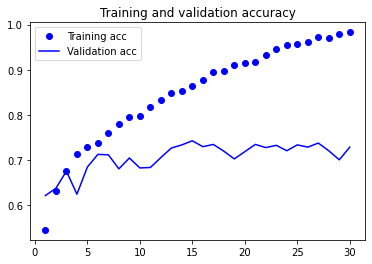

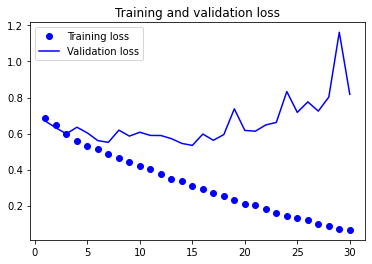

In [41]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Displaying some randomly augmented training images
#### rastgele resimler üretmek, rotate veya shift edilerek

In [4]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

<ipython-input-19-95b09451cad8>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,i+1)


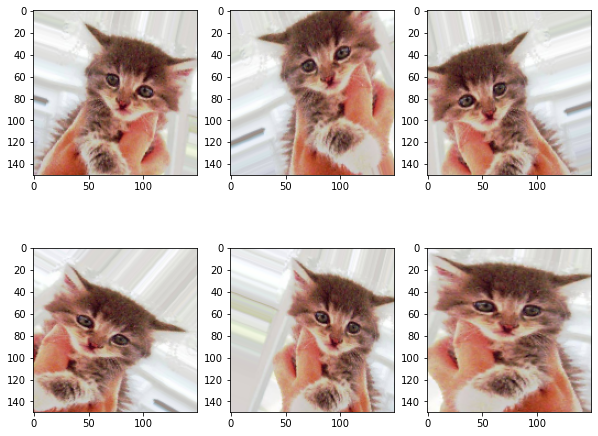

In [19]:



from keras.preprocessing import image
train_cats_dir = "C:/Users/baris/Downloads/dogs-vs-cats-small/train/cats"

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
plt.figure(figsize= (10,8))
plt.subplot(2,3,1)
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2,3,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [ ]:
## bunlar eklenip tekrardan fit edilecek 